In [1]:
from pypge.search import PGE
from pypge import expand
from pypge.benchmarks import explicit

import numpy as np

# visualization libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# plot the visuals in ipython
%matplotlib inline


/Users/tony/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Nguyen_12 x**4 - x**3 + 0.5*y**2 - y
(2, 1000)


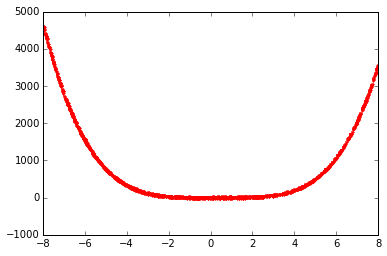

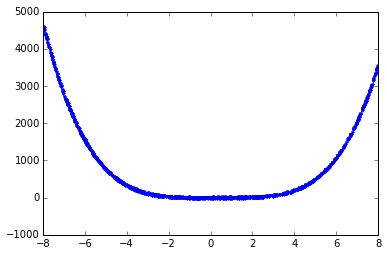

In [2]:
prob = explicit.Nguyen_12(0.1)
print prob['name'], prob['eqn']
print prob['xpts'].shape

plt.plot(prob['xpts'][0], prob['ypure'], 'r.')
plt.show()
plt.plot(prob['xpts'][0], prob['ypts'], 'b.')
plt.show()

In [3]:
pge = PGE(
    system_type = "explicit",
    search_vars = "y",
    usable_vars = prob['xs_str'],
#     usable_funcs = expand.BASIC_BASE[1:],
    pop_count = 3,
    peek_count = 9,
    max_iter = 12
    )

pge.fit(prob['xpts'], prob['ypts'])


<pypge.search.PGE instance at 0x103a067e8>
train.shape: (2, 1000) (1000,)
peekn.shape: (2, 16) (16,)



Preloop setup
  memoizing: 90
  unique: 90
  peek'n: 90
  peek_queue'n: 90
  peek_pop'd 6
  peek_pop'd 8
  eval'n: 14
  eval_queue'n: 14


ITER:  0
  eval_pop'd 6
  expanding'n: 6
  expanded to: 91
  memoizing: 91
  unique: 45
  peek'n: 45
  peek_queue'n: 45
  peek_pop'd 6
  eval'n: 6
  eval_queue'n: 6
Best so far
      id:  sz           error         r2    expld_vari    theModel
-----------------------------------------------------------------------------------
       0:   3   1912198.257447   -0.525376    0.027124  -57.365616*x
      45:   5   1214912.356108    0.030855    0.030855  -42.565204*x + 837.850767
       2:   6    181711.040667    0.855048    0.871985  46.514936*x**2
      47:   8    134009.431521    0.893100    0.893100  54.966456*x**2 - 327.360818
      55:  11    106893.659236    0.914730    0.914730  54.707011*x**2 - 35.655572*x - 335.321709
      71:  15     99286.2

In [ ]:
pge.finalize()

In [ ]:
a1 = pge.memoizer.models[520]
a2 = pge.memoizer.models[626]
print a1
print a2
s1 = a1.calc_tree_size_printing()
s2 = a2.calc_tree_size_printing()
print s1, s2

b1 = pge.memoizer.models[522]
b2 = pge.memoizer.models[630]
b3 = pge.memoizer.models[579]
print b1
print b2
print b3
t1 = b1.calc_tree_size_printing()
t2 = b2.calc_tree_size_printing()
t3 = b3.calc_tree_size_printing()
print t1, t2, t3


In [ ]:
pge_szs = [m.size() for m in pge.final]
pge_scr = [m.score for m in pge.final]
pge_evar = [1.0 - m.evar for m in pge.final]

pge_szs_f = [m.size() for m in pge.final_paretos[0]]
pge_scr_f = [m.score for m in pge.final_paretos[0]]
pge_evar_f = [1.0 - m.evar for m in pge.final_paretos[0]]

plt.plot(pge_szs, pge_scr, 'b.', pge_szs_f, pge_scr_f, 'ro')
plt.show()
plt.plot(pge_szs, pge_evar, 'b.', pge_szs_f, pge_evar_f, 'ro')
plt.show()

In [ ]:
from pypge.evaluate import Eval

for best_m in pge.final_paretos[0]:
    print best_m
    y_pred = Eval(best_m, pge.vars, prob['xpts'])
    plt.plot(prob['xpts'][0], prob['ypts'], 'r.',prob['xpts'][0], y_pred, 'b.')
    plt.show()


In [ ]:
from sympy import *

import networkx as nx
G = pge.graph
n_nodes = G.number_of_nodes()
n_edges = G.number_of_edges()
print n_nodes, n_edges

print nx.info(G)

print nx.density(G)

bins = nx.degree_histogram(G)


# pos=nx.graphviz_layout(G,prog="twopi",root=pge.root_model)
# nx.draw_networkx(G,pos,with_labels=False,node_size=30)
# nx.draw_circular(G,with_labels=False,node_size=30)

# pos=nx.shell_layout(G,pge.iter_expands)
# nx.draw_networkx(G,pos,with_labels=False,node_size=30)

plt.yscale('log')
plt.bar(range(0,len(bins)),bins)
plt.draw()
